In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [4]:
model = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((3,3)),
        Flatten(),
        Dense(10, activation='softmax')

])

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
model.compile(
    
    optimizer= opt,
    loss = 'sparse_categorical_crossentropy', #sparse_categorical_crossentropy --> data labels are integers
    metrics= [acc, mae]
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [7]:
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


In [8]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [12]:
train_images=train_images/ 255.
test_images=test_images / 255.

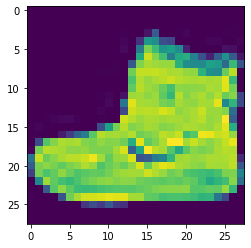

label: Ankle boot


In [13]:
# Display one of the images
i=0
img= train_images[i, :, :]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")


In [14]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)

Epoch 1/8
235/235 - 12s - loss: 0.5608 - sparse_categorical_accuracy: 0.8036 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 - 12s - loss: 0.3681 - sparse_categorical_accuracy: 0.8705 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 - 12s - loss: 0.3328 - sparse_categorical_accuracy: 0.8809 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 - 12s - loss: 0.3129 - sparse_categorical_accuracy: 0.8884 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 - 12s - loss: 0.3006 - sparse_categorical_accuracy: 0.8924 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 - 12s - loss: 0.2929 - sparse_categorical_accuracy: 0.8950 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 - 12s - loss: 0.2869 - sparse_categorical_accuracy: 0.8960 - mean_absolute_error: 4.4200
Epoch 8/8
235/235 - 12s - loss: 0.2783 - sparse_categorical_accuracy: 0.8999 - mean_absolute_error: 4.4200


In [15]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.560751,0.803633,4.419999
1,0.368147,0.870550,4.420000
2,0.332814,0.880900,4.419998
3,0.312911,0.888383,4.420000
4,0.300597,0.892400,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

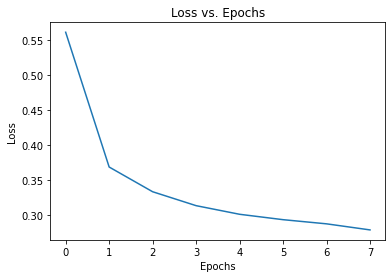

In [16]:
# Make a plot for the loss

loss_plot= df.plot(y = "loss", title = "Loss vs. Epochs", legend= False)
loss_plot.set(xlabel="Epochs", ylabel= "Loss" )